## read the data

In [56]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
from adata_hf_datasets.utils import setup_logging

setup_logging()

<RootLogger root (INFO)>

In [58]:
import numpy as np
import anndata

In [62]:
adata_path = "../data/RNA/raw/train/geo_7k.h5ad"
adata = anndata.read_h5ad(adata_path)

In [9]:
adata.obs["experiment_accession"] = adata.obs.index

In [67]:
if adata.obs.index[1].startswith("SRX"):
    print("SRX experiment accession")

SRX experiment accession


In [10]:
from adata_hf_datasets.pp import fetch_sra_metadata

fetch_sra_metadata(
    adata,
    sample_id_key="accession",
    sra_key="sample_accession",
    exp_id_key="experiment_accession",
    new_cols=["library_layout", "library_source", "instrument"],
)

2025-04-09 08:11:13,175 - adata_hf_datasets.pp - INFO - Fetching SRA metadata for 7000 samples.
2025-04-09 08:11:13,177 - adata_hf_datasets.pp - INFO - Found 7000 unique IDs in adata.obs[accession].
2025-04-09 08:12:36,123 - adata_hf_datasets.pp - INFO - Returned 7013 unique IDs from SRA metadata.
2025-04-09 08:12:36,123 - adata_hf_datasets.pp - WARNING - Some IDs in adata.obs[accession] were not found in the SRA metadata: {'SRX9807126', 'SRX9807077', 'SRX9807195', 'SRX9807035', 'SRX9806856', 'SRX9684400', 'SRX19650850', 'SRX9806948'}
2025-04-09 08:12:36,124 - adata_hf_datasets.pp - WARNING - These will be assigned fallback='unknown'.
2025-04-09 08:12:36,124 - adata_hf_datasets.pp - INFO - Removing 21 extra IDs not present in adata.obs[accession].
2025-04-09 08:12:36,132 - adata_hf_datasets.pp - INFO - Successfully added columns ['library_layout', 'library_source', 'instrument', 'instrument_model'] to adata.obs using fallback='unknown'.


In [11]:
adata.write_h5ad(adata_path)

... storing 'library_layout' as categorical
... storing 'library_source' as categorical
... storing 'instrument_model' as categorical
... storing 'instrument' as categorical


In [60]:
adata.obs["readsaligned_log"] = np.log10(adata.obs["readsaligned"] + 1)

2025-04-11 10:05:10,252 - adata_hf_datasets.plotting - INFO - Starting QC evaluation plots.
2025-04-11 10:05:10,253 - adata_hf_datasets.plotting - INFO - Subsetting data from 7000 cells to 5000 cells.
2025-04-11 10:05:10,454 - adata_hf_datasets.plotting - INFO - Labeling known QC genes (mt, ribo, hb) if not already labeled.
2025-04-11 10:05:10,479 - adata_hf_datasets.plotting - INFO - Calculating QC metrics with qc_vars=['mt', 'ribo', 'hb'], percent_top=[20], log1p=True
2025-04-11 10:05:11,309 - adata_hf_datasets.plotting - INFO - Metrics of interest for plotting: ['total_counts', 'n_genes_by_counts', 'readsaligned_log']
2025-04-11 10:05:11,310 - adata_hf_datasets.plotting - INFO - Running PCA for the subset data. This is a quick approximate check.
2025-04-11 10:05:53,543 - adata_hf_datasets.plotting - INFO - Generating PCA plots for metrics of interest...


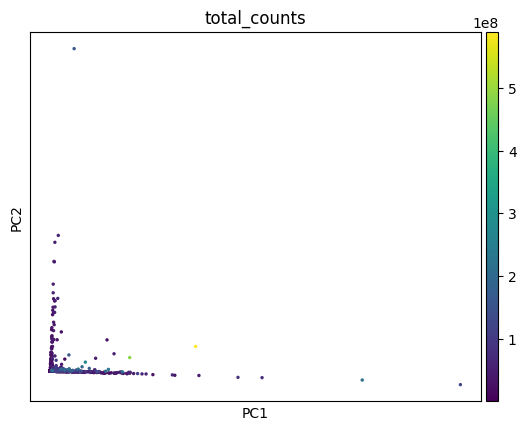

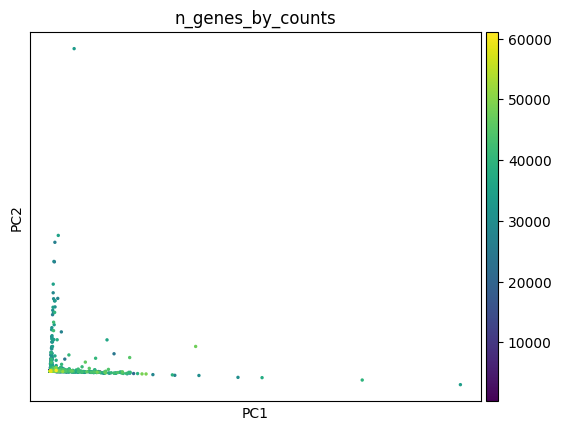

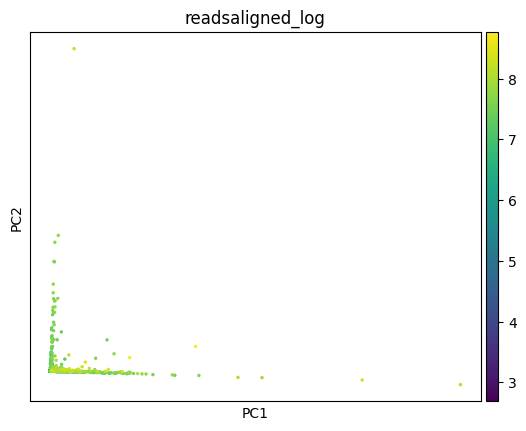

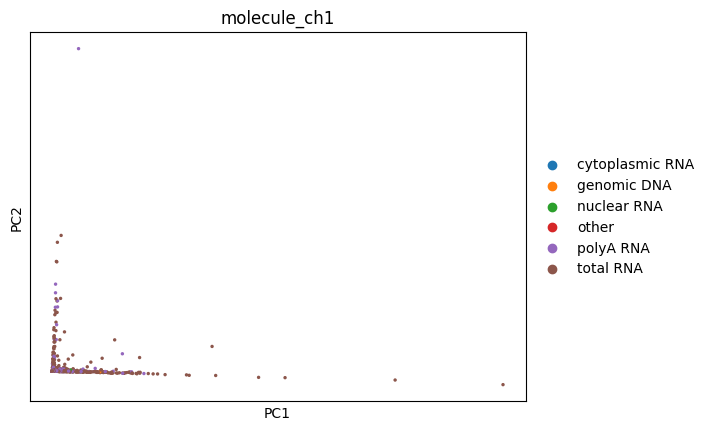

2025-04-11 10:05:54,137 - adata_hf_datasets.plotting - INFO - Generating violin plots for metrics of interest...


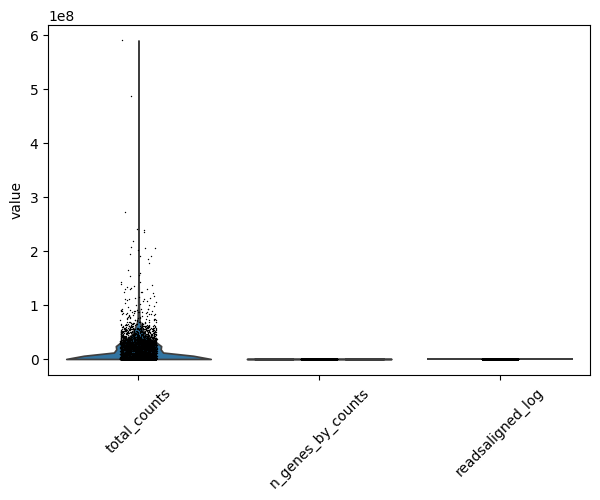

2025-04-11 10:05:54,317 - adata_hf_datasets.plotting - INFO - Generating histogram distributions for metrics of interest...


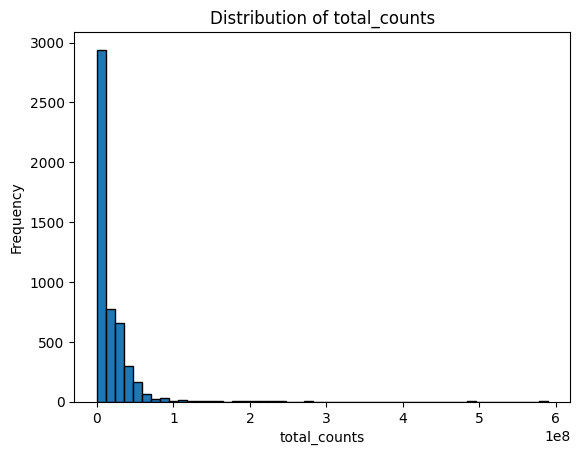

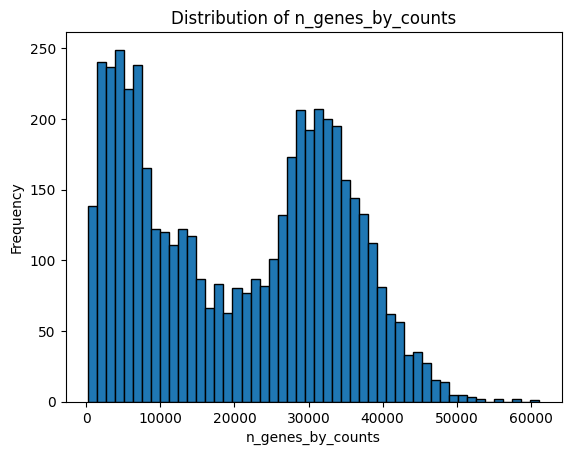

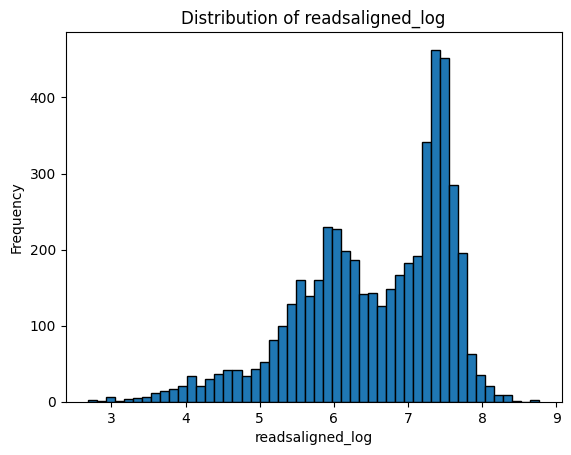

2025-04-11 10:05:54,437 - adata_hf_datasets.plotting - INFO - Generating scatter plot of total_counts vs. pct_counts_mt.


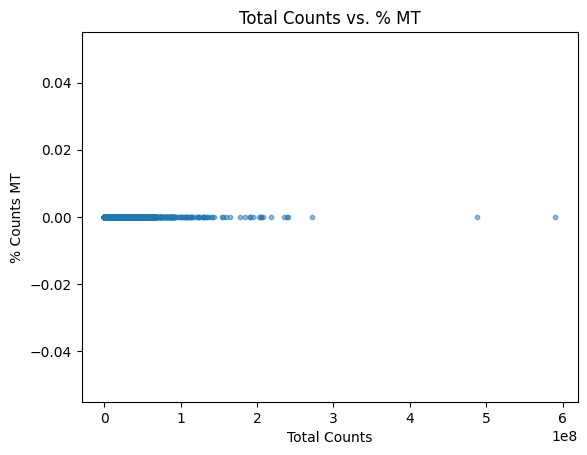

2025-04-11 10:05:54,467 - adata_hf_datasets.plotting - INFO - Investigating the effect of categorial label 'molecule_ch1'.
2025-04-11 10:05:54,467 - adata_hf_datasets.plotting - INFO - Plotting 'total_counts' by 'molecule_ch1' with violinplot.


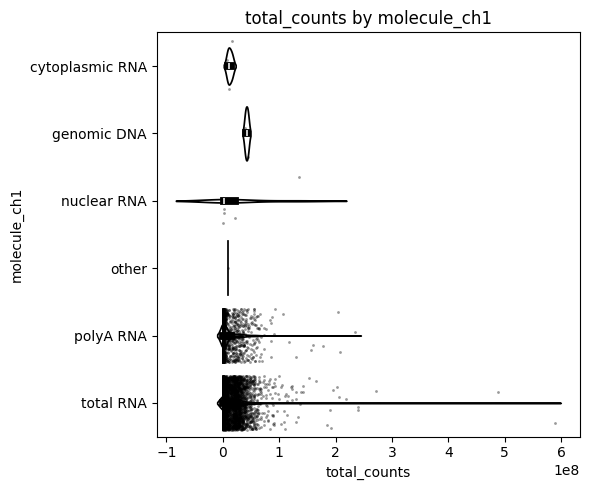

2025-04-11 10:05:54,537 - adata_hf_datasets.plotting - INFO - Plotting 'n_genes_by_counts' by 'molecule_ch1' with violinplot.


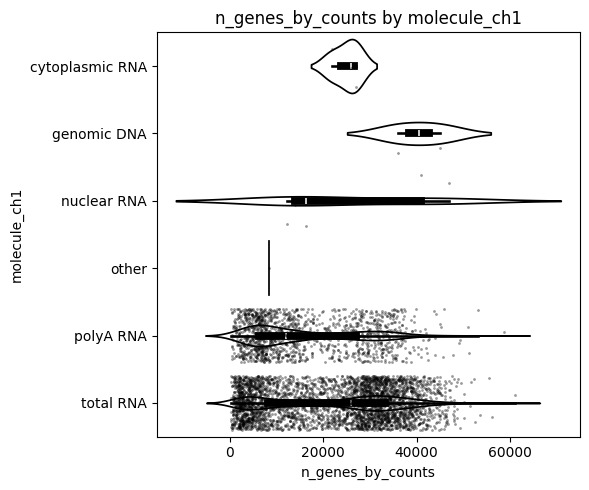

2025-04-11 10:05:54,601 - adata_hf_datasets.plotting - INFO - Plotting 'readsaligned_log' by 'molecule_ch1' with violinplot.


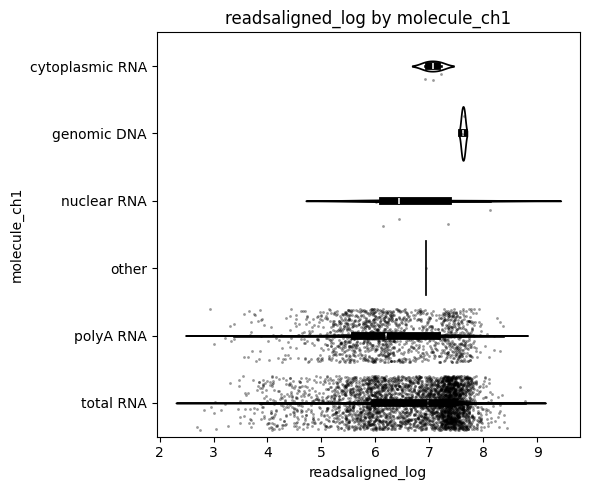

2025-04-11 10:05:54,670 - adata_hf_datasets.plotting - INFO - Finished generating QC evaluation plots.


In [ ]:
from adata_hf_datasets.pp.plotting import qc_evaluation_plots

# for geo data:
categories_of_interest = [
    "molecule_ch1",
    # "library_layout",
    # "library_source",
    # "instrument",
]
# categories_of_interest=["tissue","assay","dataset_title"]
qc_evaluation_plots(
    adata,
    metrics_of_interest=["total_counts", "n_genes_by_counts", "readsaligned_log"],
    categories_of_interest=categories_of_interest,
    save_dir=".",
    save_plots=False,
)

In [41]:
from adata_hf_datasets.pp import pp_adata

processed_path = adata_path.replace("raw", "processed")
pp_adata(
    infile=adata_path,
    outfile=processed_path,
    category_threshold=50,
    categories=["library_source", "molecule_ch1", "library_layout", "instrument"],
)

2025-04-09 08:46:33,926 - adata_hf_datasets.pp - INFO - Reading AnnData from ../data/RNA/raw/train/geo_7k.h5ad
2025-04-09 08:46:35,355 - adata_hf_datasets.pp - INFO - Starting quality control checks.
2025-04-09 08:46:35,355 - adata_hf_datasets.pp - INFO - Labeling mitochondrial, ribosomal, and hemoglobin genes in adata.var
2025-04-09 08:46:35,382 - adata_hf_datasets.pp - INFO - Calculating QC metrics with percent_top=[20, 50, 100], log1p=True, for gene sets [mt, ribo, hb].
2025-04-09 08:46:36,663 - adata_hf_datasets.pp - INFO - Flagging outliers for total counts, number of genes, and %% in top genes.
2025-04-09 08:46:36,664 - adata_hf_datasets.pp - INFO - Flagging outliers for mitochondrial fraction.
2025-04-09 08:46:37,042 - adata_hf_datasets.pp - INFO - Filtered out 539 cells as outliers (main or mt). Remaining cells: 6461.
2025-04-09 08:46:37,043 - adata_hf_datasets.pp - INFO - QC filtering complete.
2025-04-09 08:46:37,043 - adata_hf_datasets.pp - INFO - Starting in-memory preproce

In [48]:
from adata_hf_datasets.pp import fit_GMM

adata_pp = anndata.read_h5ad(processed_path)
adata_pp.obs["readsaligned_log"] = np.log(adata_pp.obs["readsaligned"] + 1)
fit_GMM(adata_pp, n_components=2, column_name="readsaligned_log")

2025-04-09 08:55:22,046 - adata_hf_datasets.pp - INFO - Cluster counts: {'low': 3526, 'high': 2816}


2025-04-09 08:55:37,082 - adata_hf_datasets.plotting - INFO - Starting QC evaluation plots.
2025-04-09 08:55:37,083 - adata_hf_datasets.plotting - INFO - Subsetting data from 6342 cells to 5000 cells.
2025-04-09 08:55:37,367 - adata_hf_datasets.plotting - INFO - Labeling known QC genes (mt, ribo, hb) if not already labeled.
2025-04-09 08:55:37,368 - adata_hf_datasets.plotting - INFO - Calculating QC metrics with qc_vars=['mt', 'ribo', 'hb'], percent_top=[20], log1p=True
2025-04-09 08:55:38,009 - adata_hf_datasets.plotting - INFO - Metrics of interest for plotting: ['total_counts', 'n_genes_by_counts', 'readsaligned_log']
2025-04-09 08:55:38,010 - adata_hf_datasets.plotting - INFO - Running PCA for the subset data. This is a quick approximate check.
2025-04-09 08:56:08,770 - adata_hf_datasets.plotting - INFO - Generating PCA plots for metrics of interest...
... storing 'readsaligned_log_label' as categorical


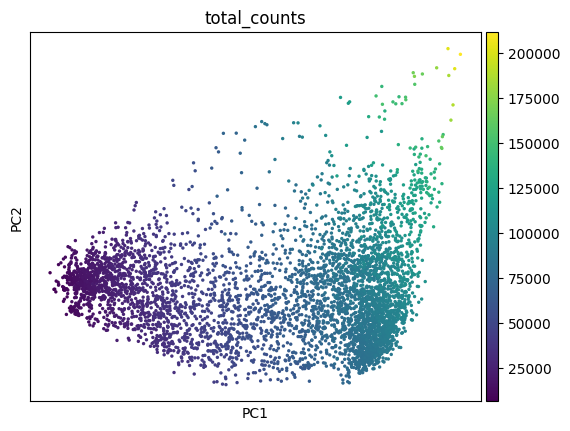

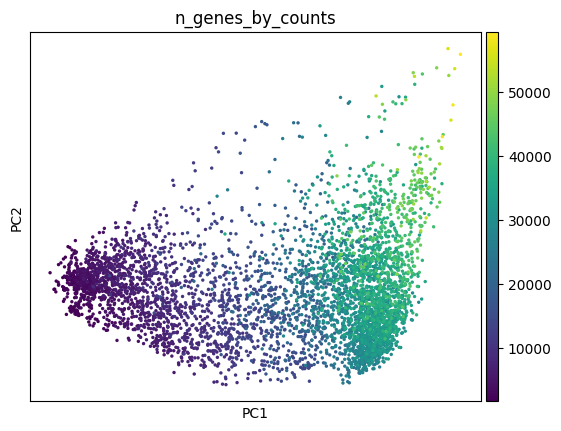

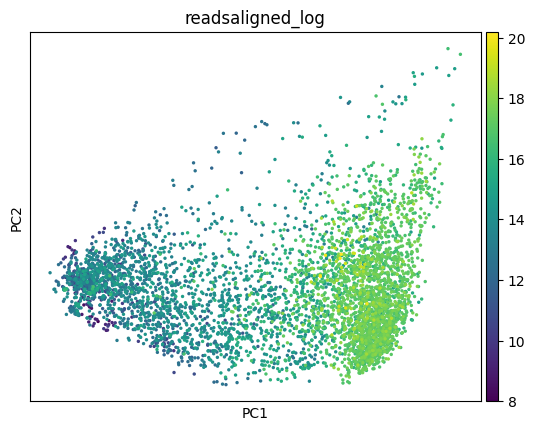

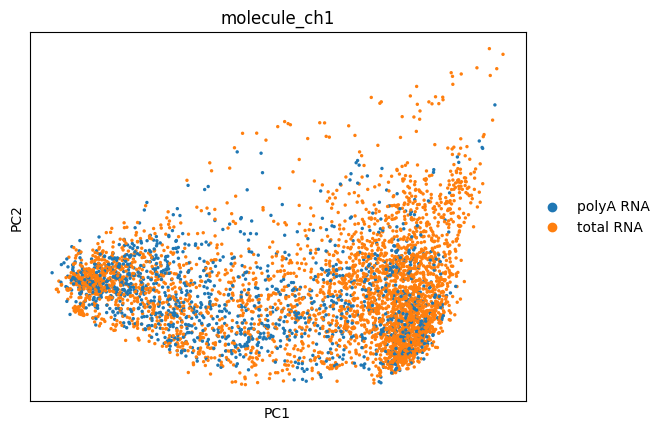

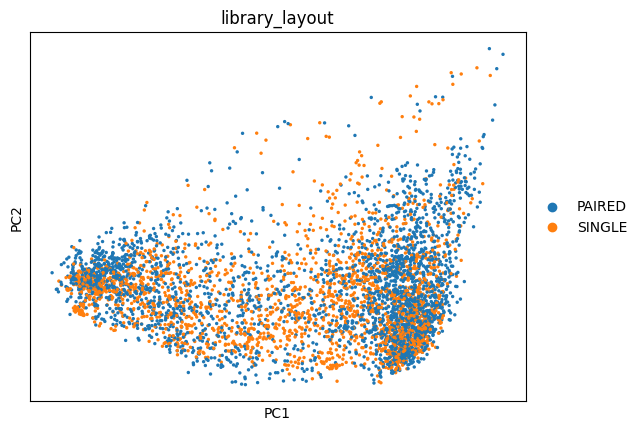

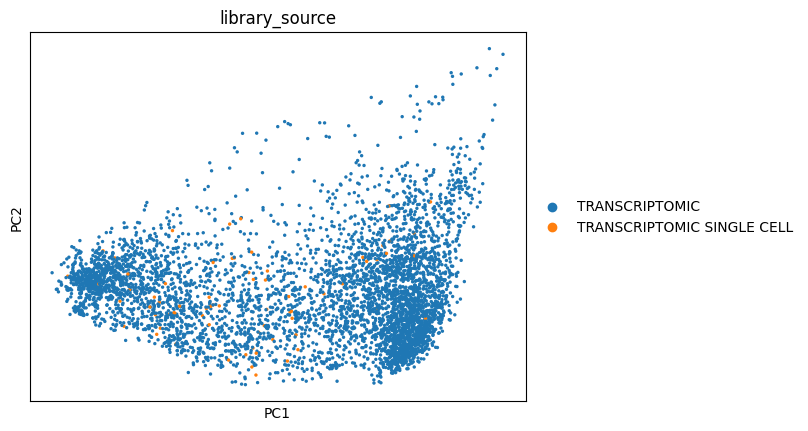

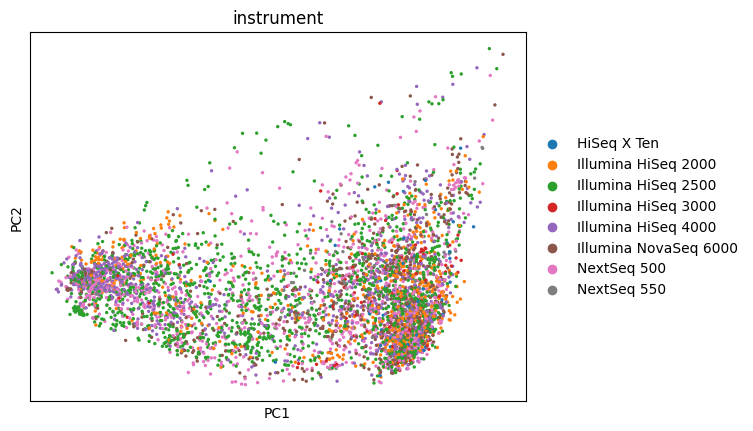

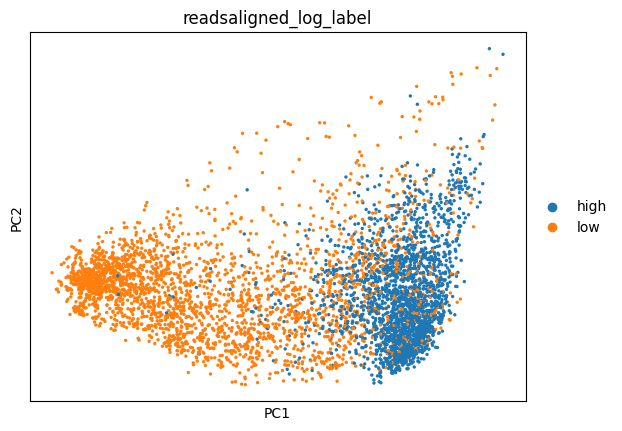

2025-04-09 08:56:10,110 - adata_hf_datasets.plotting - INFO - Generating violin plots for metrics of interest...


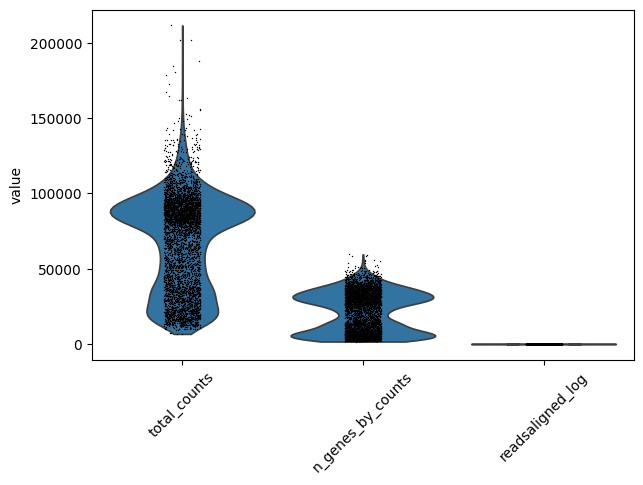

2025-04-09 08:56:10,308 - adata_hf_datasets.plotting - INFO - Generating histogram distributions for metrics of interest...


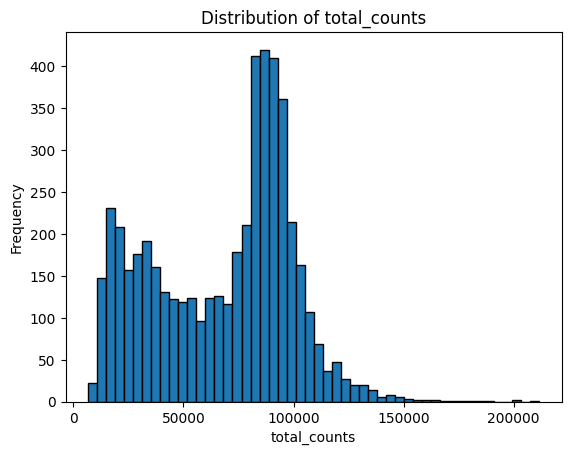

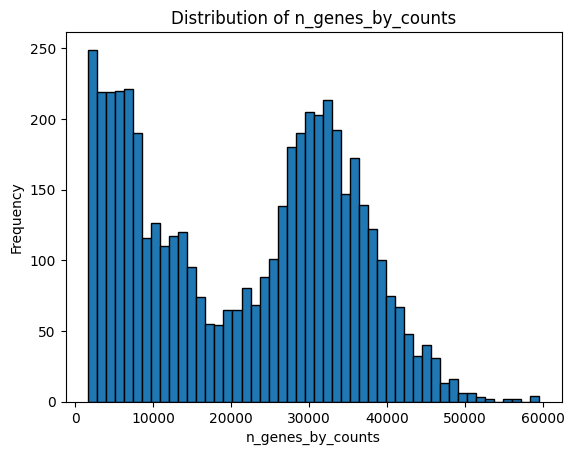

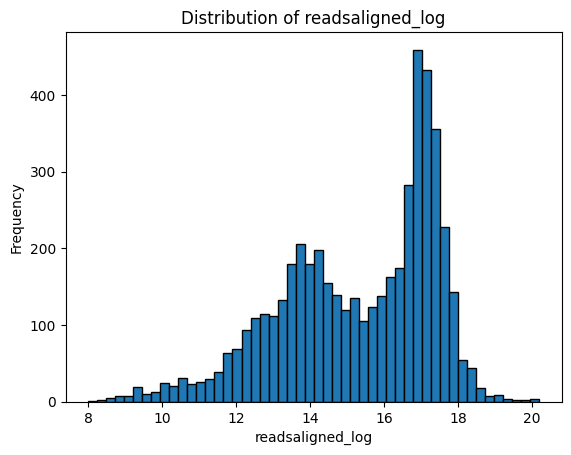

2025-04-09 08:56:10,451 - adata_hf_datasets.plotting - INFO - Generating scatter plot of total_counts vs. pct_counts_mt.


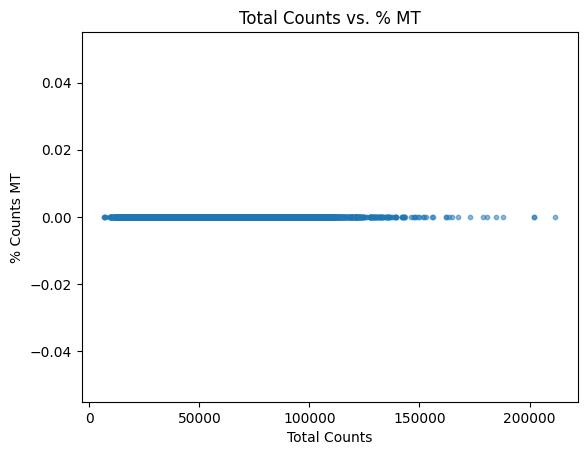

2025-04-09 08:56:10,481 - adata_hf_datasets.plotting - INFO - Investigating the effect of categorial label 'molecule_ch1'.
2025-04-09 08:56:10,481 - adata_hf_datasets.plotting - INFO - Plotting 'total_counts' by 'molecule_ch1' with violinplot.


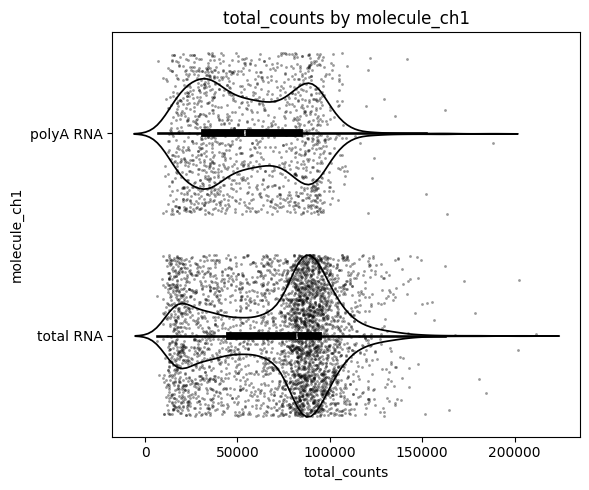

2025-04-09 08:56:10,534 - adata_hf_datasets.plotting - INFO - Plotting 'n_genes_by_counts' by 'molecule_ch1' with violinplot.


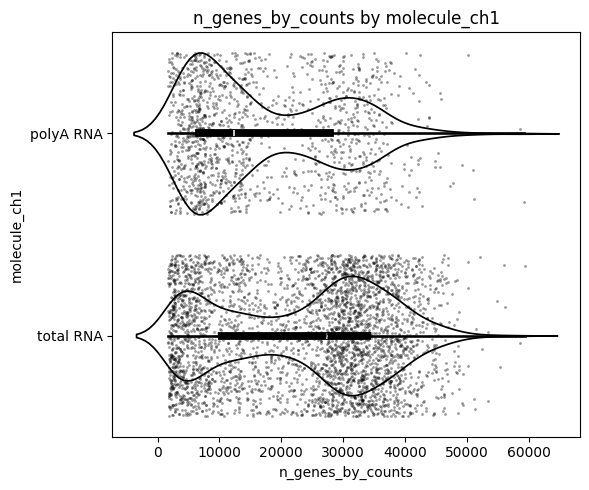

2025-04-09 08:56:10,586 - adata_hf_datasets.plotting - INFO - Plotting 'readsaligned_log' by 'molecule_ch1' with violinplot.


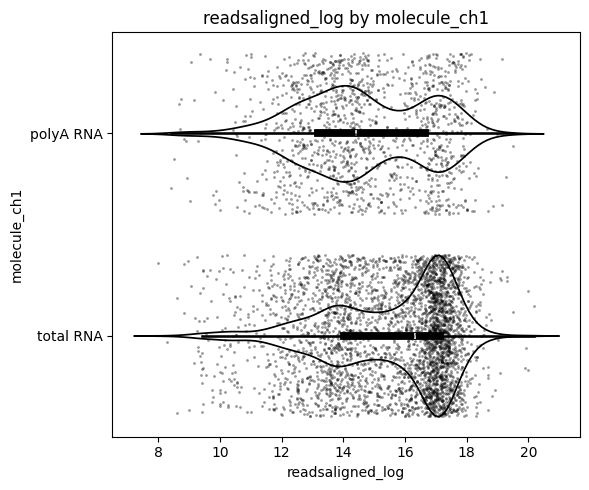

2025-04-09 08:56:10,639 - adata_hf_datasets.plotting - INFO - Investigating the effect of categorial label 'library_layout'.
2025-04-09 08:56:10,639 - adata_hf_datasets.plotting - INFO - Plotting 'total_counts' by 'library_layout' with violinplot.


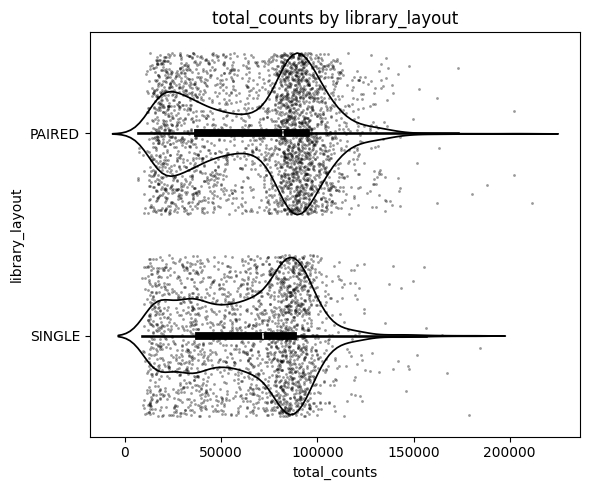

2025-04-09 08:56:10,691 - adata_hf_datasets.plotting - INFO - Plotting 'n_genes_by_counts' by 'library_layout' with violinplot.


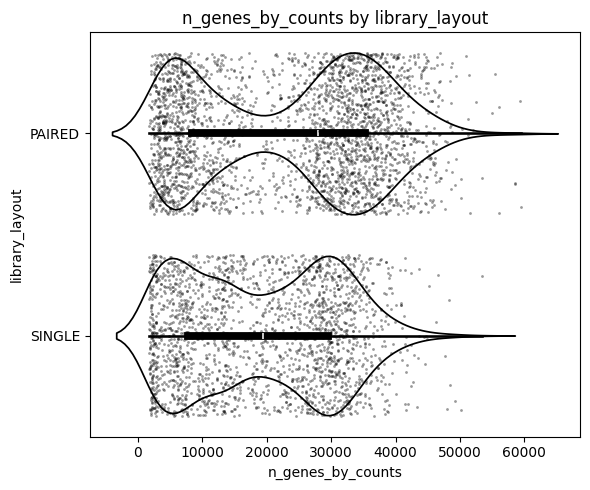

2025-04-09 08:56:10,743 - adata_hf_datasets.plotting - INFO - Plotting 'readsaligned_log' by 'library_layout' with violinplot.


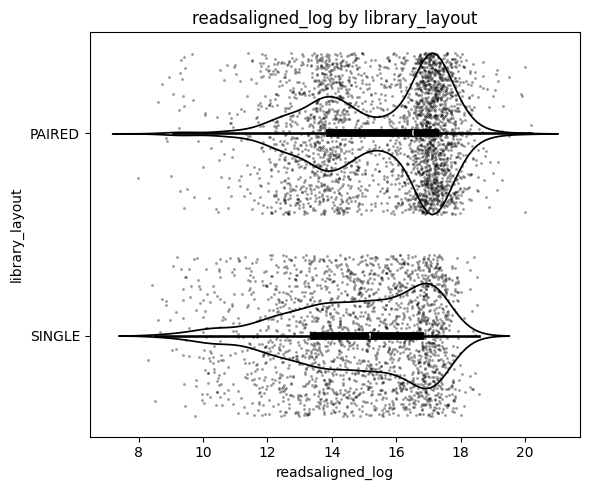

2025-04-09 08:56:10,793 - adata_hf_datasets.plotting - INFO - Investigating the effect of categorial label 'library_source'.
2025-04-09 08:56:10,794 - adata_hf_datasets.plotting - INFO - Plotting 'total_counts' by 'library_source' with violinplot.


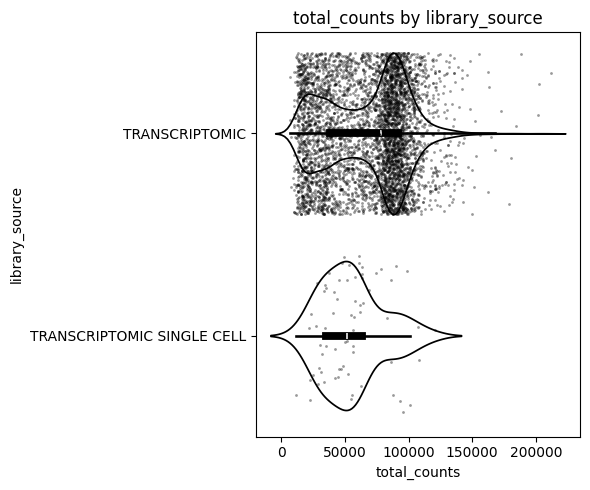

2025-04-09 08:56:10,843 - adata_hf_datasets.plotting - INFO - Plotting 'n_genes_by_counts' by 'library_source' with violinplot.


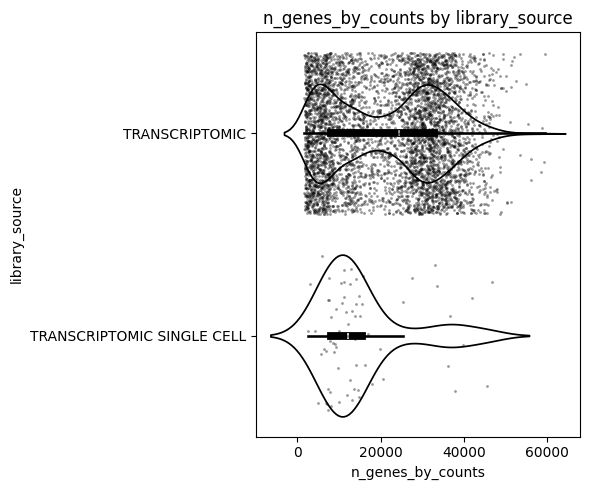

2025-04-09 08:56:10,893 - adata_hf_datasets.plotting - INFO - Plotting 'readsaligned_log' by 'library_source' with violinplot.


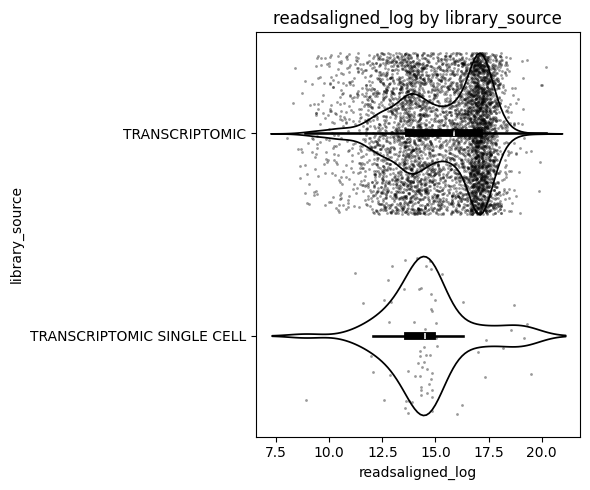

2025-04-09 08:56:11,192 - adata_hf_datasets.plotting - INFO - Investigating the effect of categorial label 'instrument'.
2025-04-09 08:56:11,193 - adata_hf_datasets.plotting - INFO - Plotting 'total_counts' by 'instrument' with violinplot.


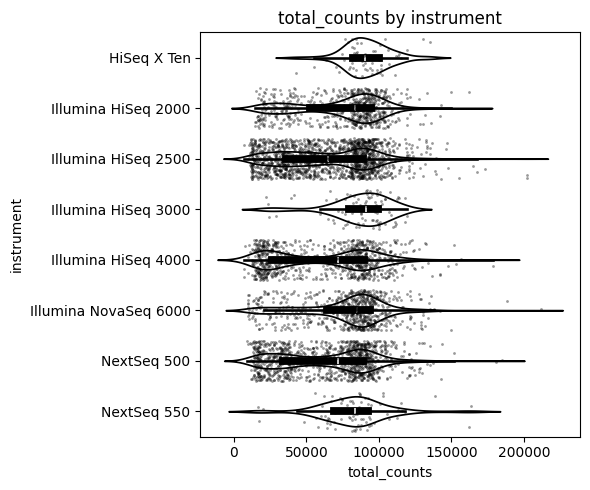

2025-04-09 08:56:11,278 - adata_hf_datasets.plotting - INFO - Plotting 'n_genes_by_counts' by 'instrument' with violinplot.


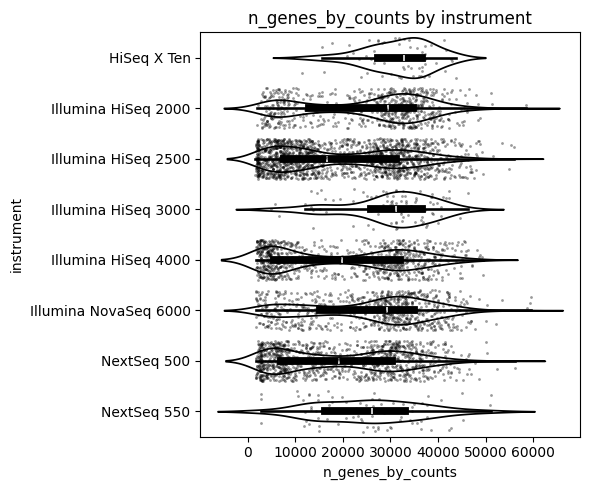

2025-04-09 08:56:11,364 - adata_hf_datasets.plotting - INFO - Plotting 'readsaligned_log' by 'instrument' with violinplot.


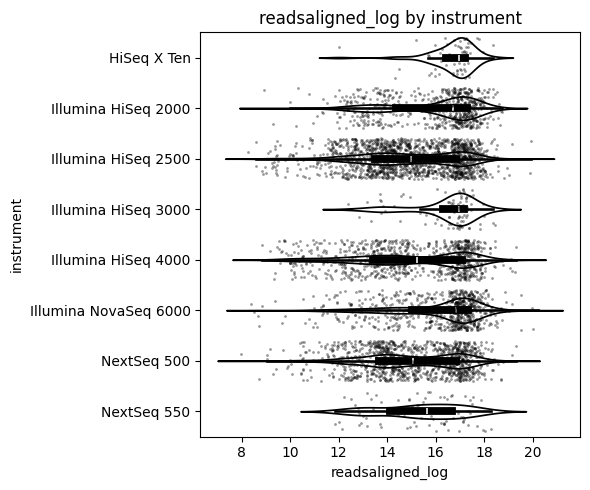

2025-04-09 08:56:11,452 - adata_hf_datasets.plotting - INFO - Investigating the effect of categorial label 'readsaligned_log_label'.
2025-04-09 08:56:11,452 - adata_hf_datasets.plotting - INFO - Plotting 'total_counts' by 'readsaligned_log_label' with violinplot.


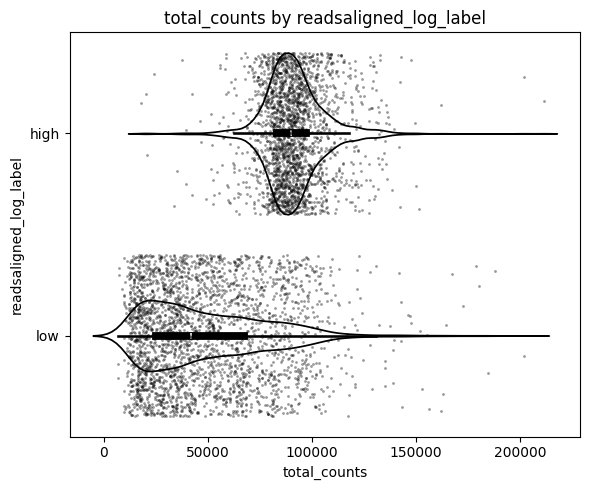

2025-04-09 08:56:11,504 - adata_hf_datasets.plotting - INFO - Plotting 'n_genes_by_counts' by 'readsaligned_log_label' with violinplot.


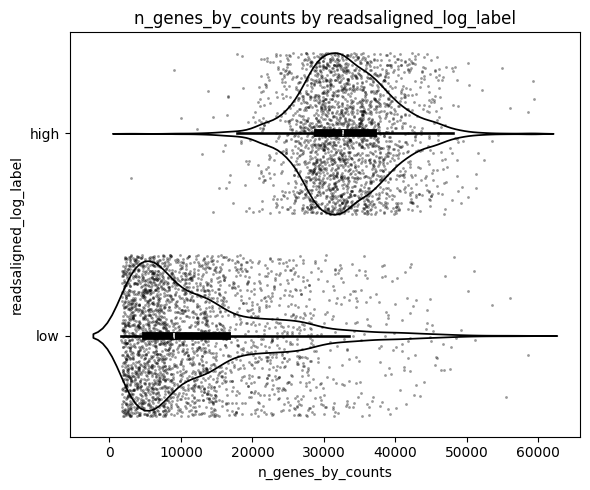

2025-04-09 08:56:11,559 - adata_hf_datasets.plotting - INFO - Plotting 'readsaligned_log' by 'readsaligned_log_label' with violinplot.


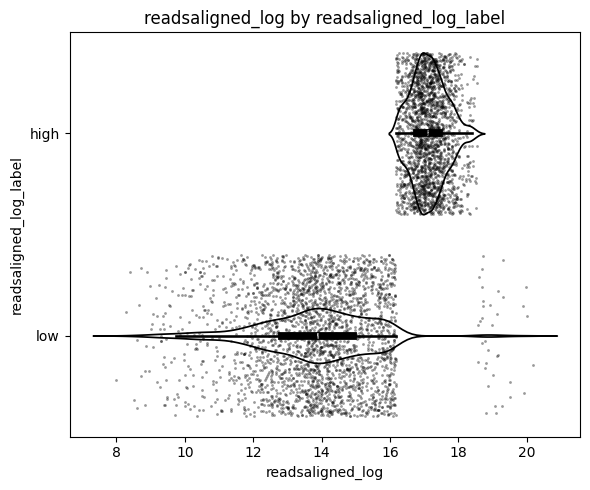

2025-04-09 08:56:11,621 - adata_hf_datasets.plotting - INFO - Finished generating QC evaluation plots.


In [49]:
qc_evaluation_plots(
    adata_pp,
    metrics_of_interest=["total_counts", "n_genes_by_counts", "readsaligned_log"],
    categories_of_interest=categories_of_interest + ["readsaligned_log_label"],
    save_dir=".",
    save_plots=False,
)

In [53]:
import statsmodels.formula.api as smf

# Suppose your covariates are in adata.obs columns, e.g.:
covariates = ["molecule_ch1", "library_layout", "instrument"]
outcome_col = "readsaligned_log_label"

# Build a DataFrame from adata.obs
df = adata_pp.obs[[outcome_col] + covariates].copy()
df.dropna(inplace=True)  # remove rows with missing data, including the mode_label

# Convert mode_label to integer if not already
# make outcome_col binary
df[outcome_col] = df[outcome_col].replace({"low": 0, "high": 1})
df[outcome_col] = df[outcome_col].astype(int)
# df["readsaligned"] = np.log1p(df["readsaligned"])
# statsmodels treats logistic regression as:
#   mode_label ~ C(cat1) + C(cat2) + numeric_var
formula = "readsaligned_log_label ~ C(molecule_ch1) + C(library_layout) + C(instrument)"

model = smf.logit(formula=formula, data=df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.625656
         Iterations 5
                             Logit Regression Results                             
Dep. Variable:     readsaligned_log_label   No. Observations:                 6342
Model:                              Logit   Df Residuals:                     6332
Method:                               MLE   Df Model:                            9
Date:                    Wed, 09 Apr 2025   Pseudo R-squ.:                 0.08912
Time:                            09:01:24   Log-Likelihood:                -3967.9
converged:                           True   LL-Null:                       -4356.1
Covariance Type:                nonrobust   LLR p-value:                2.551e-161
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept           

In [45]:
import pandas as pd

# For each categorical covariate:
for cat_col in ["molecule_ch1", "library_layout", "instrument"]:
    print(f"\n=== {cat_col} vs. {outcome_col} ===")
    print(pd.crosstab(df[cat_col], df[outcome_col]))


=== molecule_ch1 vs. n_genes_by_counts_label ===
n_genes_by_counts_label     0     1
molecule_ch1                       
polyA RNA                1114   679
total RNA                1544  3005

=== library_layout vs. n_genes_by_counts_label ===
n_genes_by_counts_label     0     1
library_layout                     
PAIRED                   1382  2209
SINGLE                   1276  1475

=== instrument vs. n_genes_by_counts_label ===
n_genes_by_counts_label    0    1
instrument                       
HiSeq X Ten                5   74
Illumina HiSeq 2000      250  575
Illumina HiSeq 2500      989  967
Illumina HiSeq 3000       20   98
Illumina HiSeq 4000      497  537
Illumina NovaSeq 6000    246  650
NextSeq 500              622  708
NextSeq 550               29   75


In [47]:
import logging
import matplotlib.pyplot as plt
import anndata

logger = logging.getLogger(__name__)


def scatter_reads_vs_metric(
    adata: anndata.AnnData,
    x_key: str = "readsaligned",
    y_key: str = "total_counts",
    max_points: int = 2000,
    log_scale_x: bool = False,
    log_scale_y: bool = False,
):
    """
    Creates a scatter plot of two numeric columns in `adata.obs`, by default
    'readsaligned' vs. 'total_counts'. Subsamples to `max_points` for large datasets.

    Parameters
    ----------
    adata : anndata.AnnData
        AnnData object containing single-cell or bulk RNA-seq data. Must have
        the columns `x_key` and `y_key` in `adata.obs`.
    x_key : str, optional
        The key in `adata.obs` for the x-axis (e.g., 'readsaligned').
    y_key : str, optional
        The key in `adata.obs` for the y-axis (e.g., 'total_counts' or 'n_genes_by_counts').
    max_points : int, optional
        Maximum number of samples (rows) to plot. If your dataset is larger,
        it will be randomly subsampled to this many points.
    log_scale_x : bool, optional
        Whether to apply a log scale to the x-axis.
    log_scale_y : bool, optional
        Whether to apply a log scale to the y-axis.

    References
    ----------
    Data source:
        Typically, 'readsaligned' might come from metadata indicating
        total mapped reads per sample.
        'total_counts' or 'n_genes_by_counts' come from sc.pp.calculate_qc_metrics
        or your custom pipeline.

    Examples
    --------
    >>> scatter_reads_vs_metric(adata, x_key="readsaligned", y_key="total_counts")
    """
    if x_key not in adata.obs.columns:
        raise ValueError(f"{x_key} not found in adata.obs.")
    if y_key not in adata.obs.columns:
        raise ValueError(f"{y_key} not found in adata.obs.")

    logger.info("Preparing scatter plot of '%s' vs. '%s'.", x_key, y_key)

    # Extract the arrays
    x_vals = adata.obs[x_key].values
    y_vals = adata.obs[y_key].values
    n_samples = len(x_vals)

    logger.info("Total samples in dataset: %d", n_samples)
    if n_samples > max_points:
        idx = np.random.choice(n_samples, max_points, replace=False)
        logger.info("Subsampling to %d points for plotting.", max_points)
        x_vals = x_vals[idx]
        y_vals = y_vals[idx]

    plt.figure(figsize=(6, 5))
    plt.scatter(x_vals, y_vals, alpha=0.6, s=20, edgecolor="none")

    plt.xlabel(x_key)
    plt.ylabel(y_key)

    if log_scale_x:
        plt.xscale("log")
    if log_scale_y:
        plt.yscale("log")

    plt.title(f"{x_key} vs. {y_key}")
    plt.tight_layout()

    plt.show()

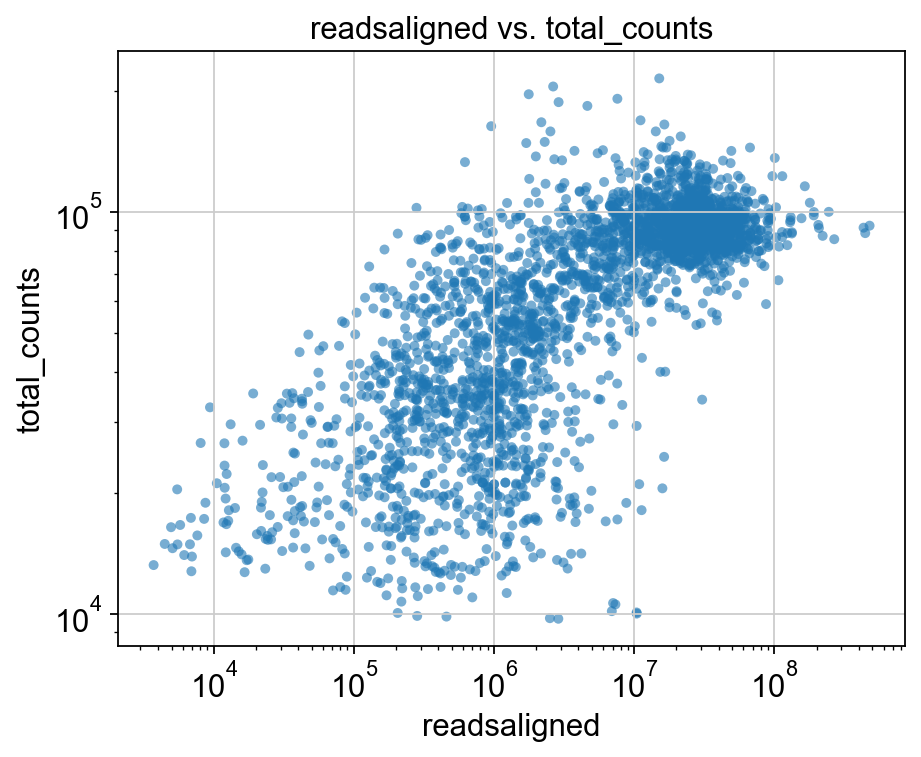

In [48]:
scatter_reads_vs_metric(
    adata_pp,
    x_key="readsaligned",
    y_key="total_counts",
    max_points=3000,
    log_scale_x=True,
    log_scale_y=True,
)

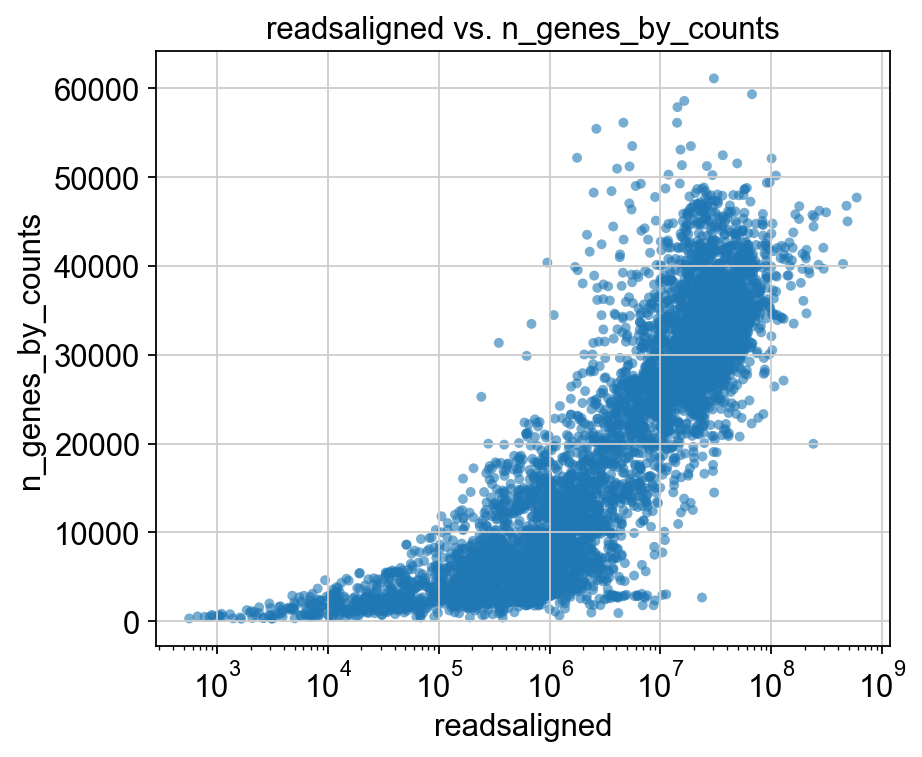

In [63]:
scatter_reads_vs_metric(
    adata,
    x_key="readsaligned",
    y_key="n_genes_by_counts",
    max_points=6000,
    log_scale_x=True,
    log_scale_y=False,
)